# Project: Power Dependance Analysis

Hamish Johnson & Elliot Wadge\
SFU PHYS 332W, Spring 2022

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.collections import LineCollection
from tool import local_max, noise, circle, outliers, gaussian, make_histogram_projection, extract_data, get_k_equipartition, gaussian_analysis
import numpy.random as rand
from scipy.optimize import curve_fit
from scipy import integrate
import scipy.constants as cnst
from glob import glob

## Trap Strength Analysis (Qualitative)

WEAK TRAP DATA AND POOR ND PLACEMENT


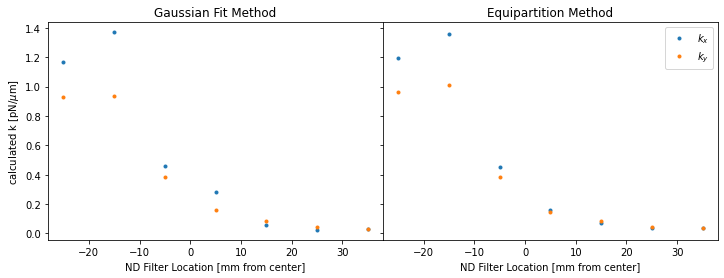

First datapoint may be outlier due to ND filter being at an agle or border
of filter glass blocking part of beam, we will look deeper into it in the quantitative analysis.
 Below we also used a stronger trab because we found that the laser was in fact being blocked.


In [ ]:
print('\033[91m'+"WEAK TRAP DATA AND POOR ND PLACEMENT"+'\033[0m')

directory = '/work/data/trap_strength/'
filenames = [directory + 'strength1.txt',directory + 'strength2.txt',directory + 'strength3.txt',
    directory + 'strength4.txt',directory + 'strength5.txt',directory + 'strength6.txt',
    directory + 'strength7.txt',]
k_arr_strength_gauss = []
k_arr_strength_eqi = []
ND_arr = np.arange(-25,45,10) # ND marker in mm

for filename in filenames:
    ret = extract_data(filename)
    
    analysis2 = gaussian_analysis(ret.x_dec, ret.y_dec)
    
    k_arr_strength_gauss.append([analysis2.k_x, analysis2.k_y])
    k_x, k_y = get_k_equipartition(ret.x_dec, ret.y_dec)
    k_arr_strength_eqi.append([k_x,k_y])
    
plt.show()
    

k_arr_strength_gauss = np.array(k_arr_strength_gauss)
k_arr_strength_eqi = np.array(k_arr_strength_eqi)



fig = plt.figure(figsize = (12,4))
gs = fig.add_gridspec(1,2, hspace=0,wspace = 0)
ax1, ax2 = gs.subplots(sharex=True, sharey=True)

ax1.plot(ND_arr,k_arr_strength_gauss[:,0],'.',label = r"$k_x$")
ax1.plot(ND_arr,k_arr_strength_gauss[:,1],'.',label = r"$k_y$")
ax1.set(xlabel="ND Filter Location [mm from center]",ylabel = r"calculated k [pN/$\mu$m]", title ="Gaussian Fit Method")

ax2.plot(ND_arr,k_arr_strength_eqi[:,0],'.',label = r"$k_x$")
ax2.plot(ND_arr,k_arr_strength_eqi[:,1],'.',label = r"$k_y$")
ax2.set(xlabel="ND Filter Location [mm from center]", title ="Equipartition Method")
plt.legend()
plt.savefig("Notes/strengthAnalysis_Qualitative.pdf",dpi = 300)
plt.show()

print("First datapoint may be outlier due to ND filter being at an agle or border\nof filter glass blocking part of beam, we will look deeper into it in the quantitative analysis.\n Below we also used a stronger trab because we found that the laser was in fact being blocked.")

# Trap Strength Quantitative

['data/trap_strength/Power01.61.txt' 'data/trap_strength/Power02.62.txt'
 'data/trap_strength/Power04.24.txt' 'data/trap_strength/Power05.21.txt'
 'data/trap_strength/Power07.16.txt' 'data/trap_strength/Power08.89.txt'
 'data/trap_strength/Power11.54.txt' 'data/trap_strength/Power14.8.txt'
 'data/trap_strength/Power20.2.txt' 'data/trap_strength/Power28.5.txt'
 'data/trap_strength/Power42.5.txt' 'data/trap_strength/Power64.1.txt'
 'data/trap_strength/Power72.2.txt' 'data/trap_strength/Power72.5.txt'
 'data/trap_strength/Power77.7.txt']
for y:
mean = 0.00625161464037667
sigma = 0.11940994168584862
variance = 0.014258734173417768
k = 0.28428789082533057 [pN/um]
for x:
mean = 0.00036500047346422576
sigma = 0.21118263409396523
variance = 0.04459810494286561
k = 0.0908914284405812 [pN/um]
for y:
mean = -0.0019342571032339025
sigma = 0.11559622259232691
variance = 0.013362486677614789
k = 0.30335562248235426 [pN/um]
for x:
mean = 0.0025947181036109833
sigma = 0.16610828309874726
variance = 0.

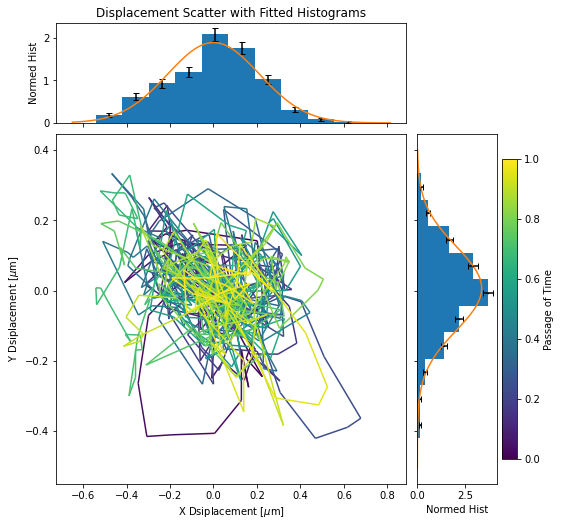

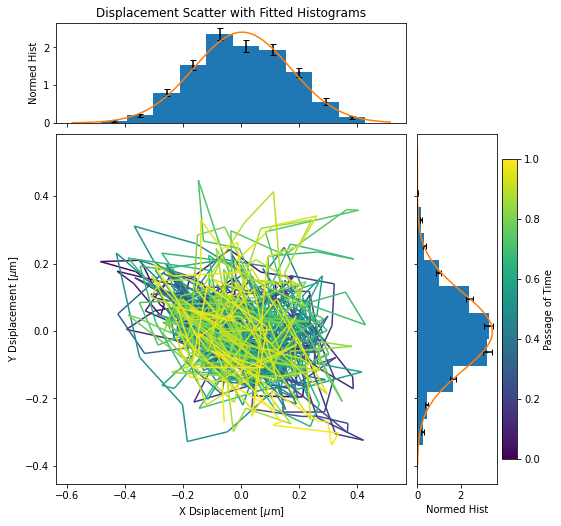

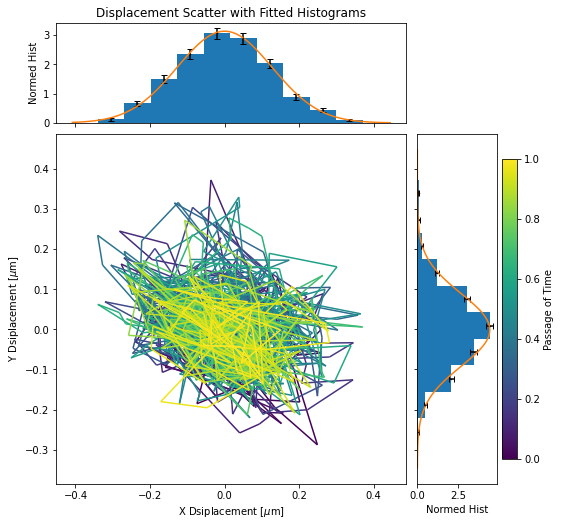

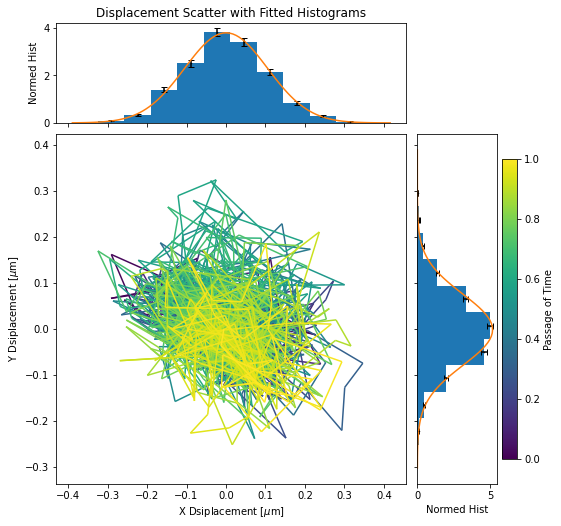

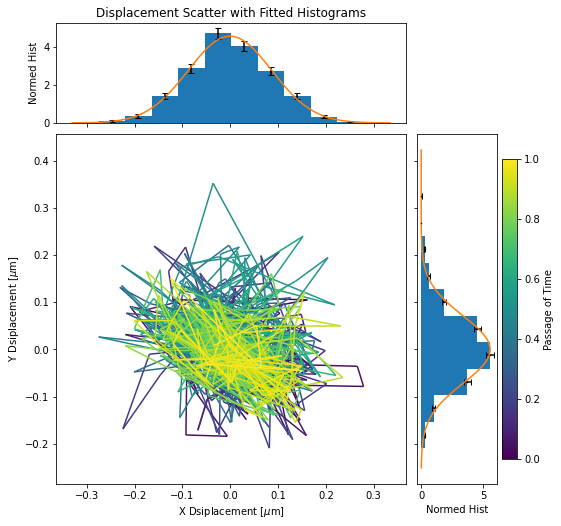

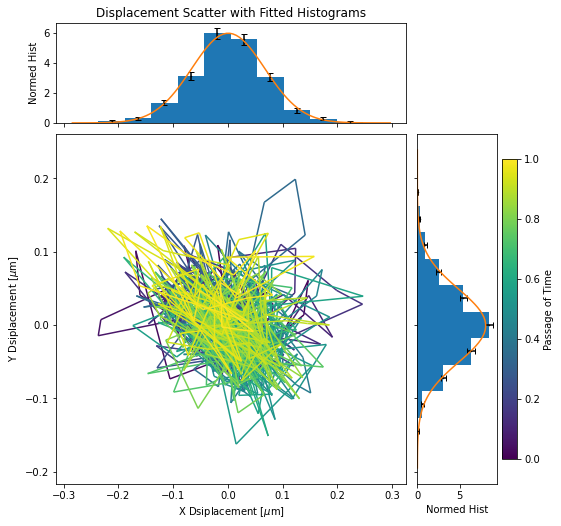

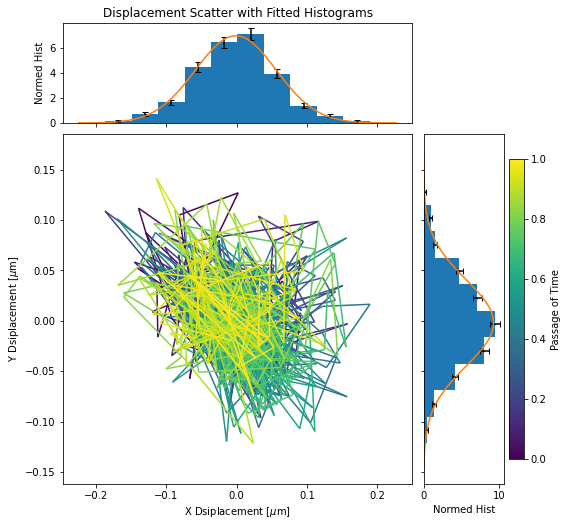

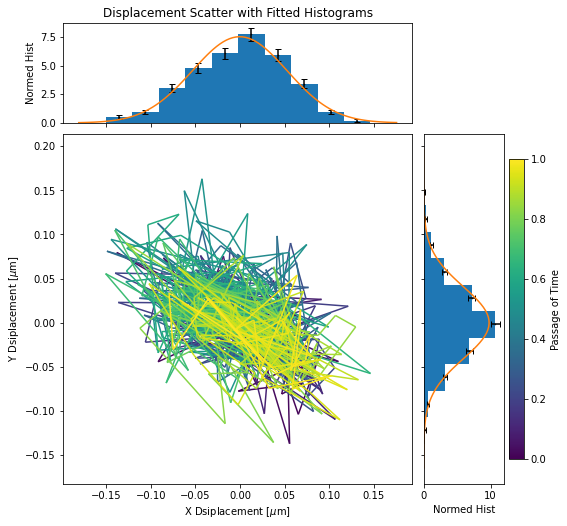

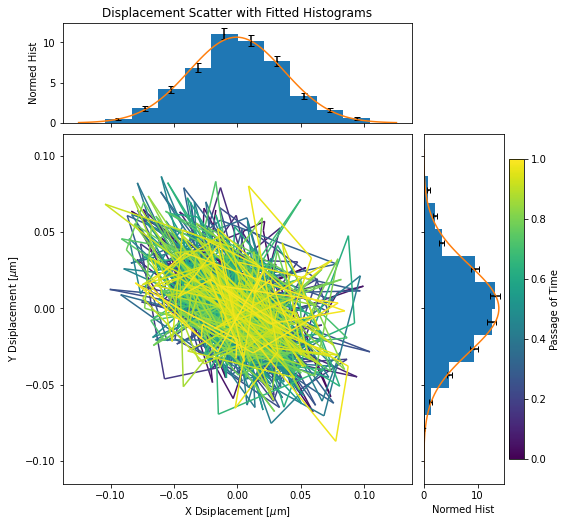

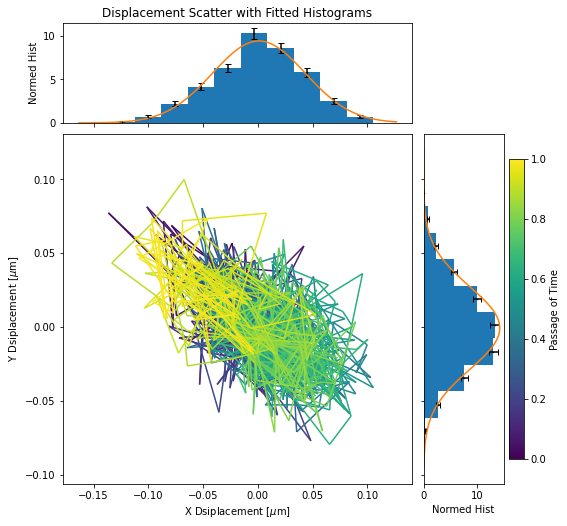

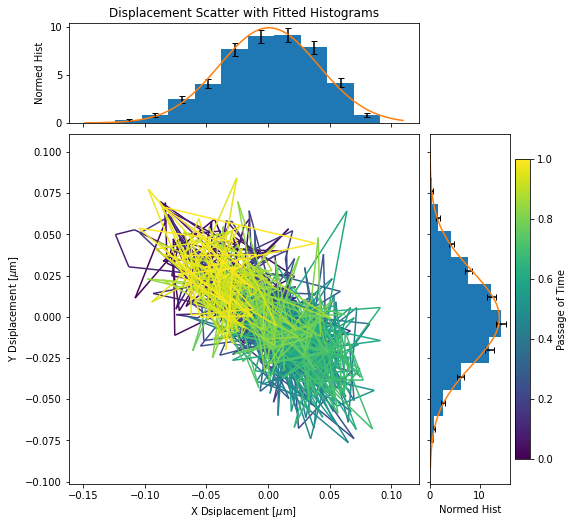

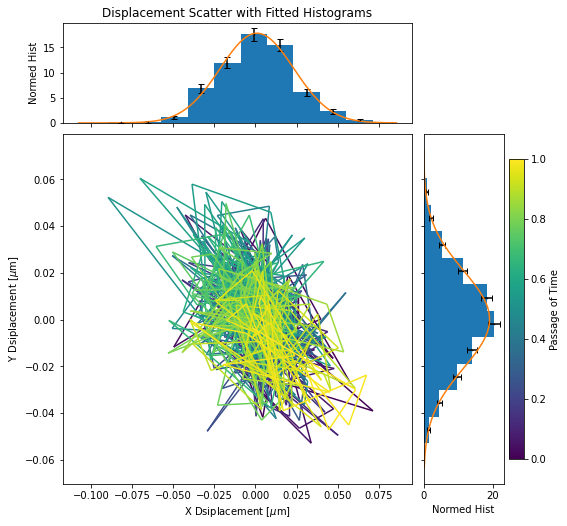

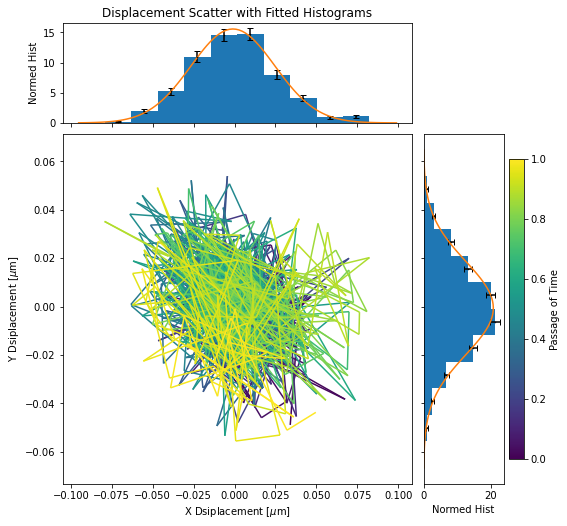

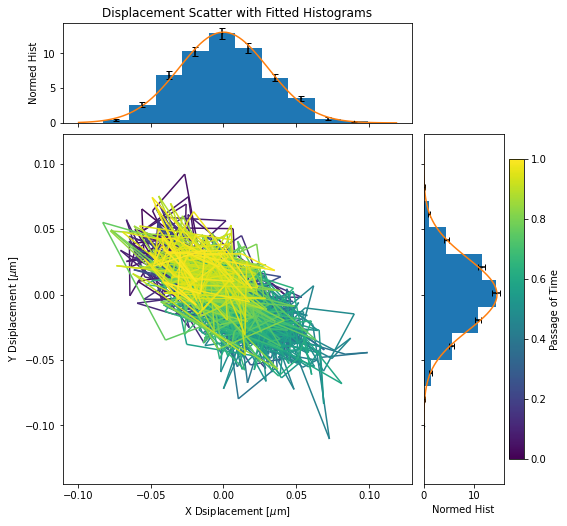

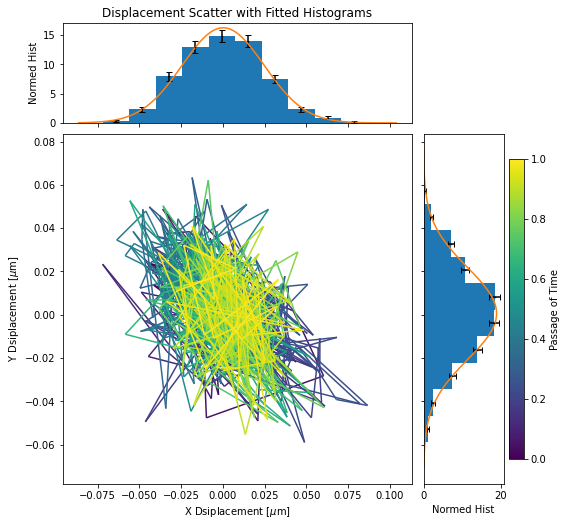

In [ ]:
filenames = np.array(glob(('data/trap_strength/Power*')))
filenames = np.sort(filenames)
print(filenames)
# filenames = np.concatenate((filenames1, filenames2))
# print(filenames)

k_b = cnst.Boltzmann
T = 293.6

k_arr = []
k_arr_strength_eqi = []
powerArray = []
kx_errorArray = []
ky_errorArray = []

for filename in filenames:
    powerArray.append(float(filename.split("Power")[1][:-4]))
    ret = extract_data(filename)
    analysis2 = make_histogram_projection(ret.x_dec, ret.y_dec,temp = T)
    # print(f"Via Gaussian Fit Method\nk_x = {analysis2.k_x}\nk_y = {analysis2.k_y}")
    k_arr.append([analysis2.k_x, analysis2.k_y])
    k_x, k_y = get_k_equipartition(ret.x_dec, ret.y_dec)
    k_arr_strength_eqi.append([k_x,k_y])
    
    std_sigma = np.sqrt(np.diag(analysis2.pCov_x))[1]
    sigma = analysis2.pOpt_x[1]
    kx_error = 2*k_b*10**18*T/sigma**3*std_sigma

    std_sigma = np.sqrt(np.diag(analysis2.pCov_y))[1]
    sigma = analysis2.pOpt_y[1]
    ky_error = 2*k_b*10**18*T/sigma**3*std_sigma

    kx_errorArray.append(kx_error)
    ky_errorArray.append(ky_error)

powerArray_err = np.array(powerArray)*0.005 # 3% relative error & 2% from deviations between suggessive measurments
old_powerArray = np.array(powerArray)
kx_errorArray = np.array(kx_errorArray)
ky_errorArray = np.array(ky_errorArray)

k_arr_strength_gauss = np.array(k_arr)[:-2]
k_arr_strength_equi = np.array(k_arr_strength_eqi)[:-2]
powerArray = np.array(powerArray)[:-2]/np.max(powerArray)

powerArray_err = np.sqrt((powerArray_err[:-2]/old_powerArray[:-2])**2 + (0.003)**2)*powerArray

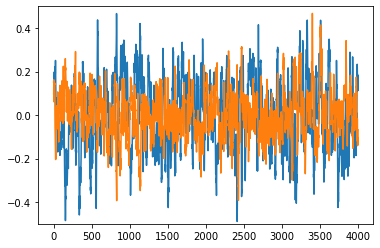

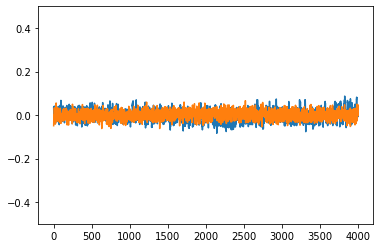

In [ ]:
filenames = ["/work/data/trap_strength/Power02.62.txt","/work/data/trap_strength/Power72.2.txt"]

for _ in filenames:
    ret = extract_data(_)
    plt.plot(ret.x[:4000])
    plt.plot(ret.y[:4000])
    plt.ylim(-0.5,0.5)
    plt.show()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pdi" which is no longer supported as of 3.3 and will become an error in 3.6


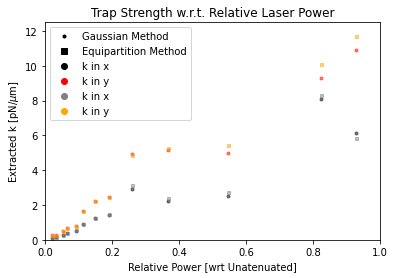

I am going to edit this plot with some graphics software to make the legend nice!


In [ ]:
alpha = 0.5

plt.plot(powerArray,k_arr_strength_gauss[:,0],".",color = "black",alpha = alpha)
plt.plot(powerArray,k_arr_strength_gauss[:,1],".",color = "red",alpha = alpha)
plt.ylabel(r"Extracted k [pN/$\mu$m]")
plt.xlabel("Relative Power [wrt Unatenuated]")
#plt.title("Trap Strength w.r.t. Relative Laser Power\nGaussian Fit Method")
#plt.legend()
#plt.show()

plt.plot(powerArray,k_arr_strength_equi[:,0],"s",markersize = 3,color = "grey",alpha = alpha)
plt.plot(powerArray,k_arr_strength_equi[:,1],"s",markersize = 3,color = "orange",alpha = alpha)

plt.plot(-10,-10,"k.",label = "Gaussian Method")
plt.plot(-10,-10,"ks",label = "Equipartition Method")
plt.plot(-10,-10,"o",label = "k in x",color = "black")
plt.plot(-10,-10,"o",label = "k in y",color = "red")
plt.plot(-10,-10,"o",label = "k in x",color = "grey")
plt.plot(-10,-10,"o",label = "k in y",color = "orange")

plt.xlim(0,1)
plt.ylim(0,12.5)

plt.ylabel(r"Extracted k [pN/$\mu$m]")
plt.xlabel("Relative Power [wrt Unatenuated]")
plt.title("Trap Strength w.r.t. Relative Laser Power")
plt.legend()
plt.savefig("Notes/strengthAnalysis_k_vs_relativePower.pdf",pdi = 300)
plt.show()

print("I am going to edit this plot with some graphics software to make the legend nice!")

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pdi" which is no longer supported as of 3.3 and will become an error in 3.6


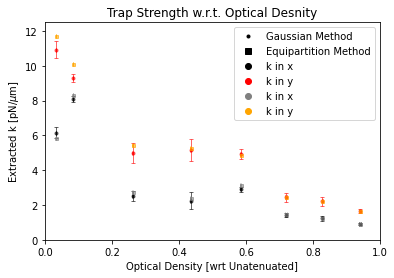

In [ ]:
# Plot WRT Optical Desnity (OD)
OD_Array = -np.log10(powerArray)
OD_Array_error = OD_Array*( 1/(powerArray*np.log(10))*powerArray_err )
# x-axis error is of order 1e-3 is very small

yerr_array_gaussx = kx_errorArray[2:]
yerr_array_gaussy = ky_errorArray[2:]

alphaVal = 0.6

plt.errorbar(OD_Array,k_arr_strength_gauss[:,0],yerr = yerr_array_gaussx, xerr = OD_Array_error, fmt =".",color = "black",alpha = alphaVal,linewidth = 1,capsize = 2)
plt.errorbar(OD_Array,k_arr_strength_gauss[:,1],yerr = yerr_array_gaussy, xerr = OD_Array_error, fmt =".",color = "red",alpha = alphaVal,linewidth = 1,capsize = 2)
plt.ylabel(r"Extracted k [pN/$\mu$m]")
plt.xlabel("OD")

plt.errorbar(OD_Array,k_arr_strength_equi[:,0], xerr = OD_Array_error, fmt="s",markersize = 3,color = "grey",alpha = alphaVal,linewidth = 1,capsize = 2)
plt.errorbar(OD_Array,k_arr_strength_equi[:,1], xerr = OD_Array_error, fmt="s",markersize = 3,color = "orange",alpha = alphaVal,linewidth = 1,capsize = 2)

plt.plot(-10,-10,"k.",label = "Gaussian Method")
plt.plot(-10,-10,"ks",label = "Equipartition Method")
plt.plot(-10,-10,"o",label = "k in x",color = "black")
plt.plot(-10,-10,"o",label = "k in y",color = "red")
plt.plot(-10,-10,"o",label = "k in x",color = "grey")
plt.plot(-10,-10,"o",label = "k in y",color = "orange")

plt.xlim(0,1)
plt.ylim(0,12.5)

plt.ylabel(r"Extracted k [pN/$\mu$m]")
plt.xlabel("Optical Density [wrt Unatenuated]")
plt.title("Trap Strength w.r.t. Optical Desnity")
plt.legend()
plt.savefig("Notes/strengthAnalysis_k_vs_OD_linear.pdf",pdi = 300)
plt.show()



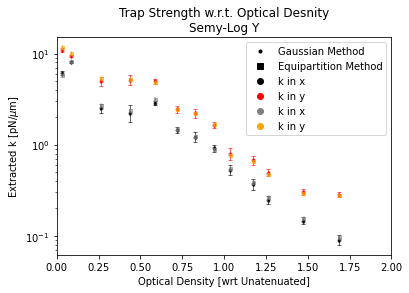

Definately looks like a decaying exponential (: lets fit this!


In [ ]:
## No errorbars
# Plot WRT Optical Desnity (OD)
OD_Array = -np.log10(powerArray)
OD_Array_error = OD_Array*( 1/(powerArray*np.log(10))*powerArray_err )
# x-axis error is of order 1e-3 is very small

yerr_array_gaussx = kx_errorArray[2:]
yerr_array_gaussy = ky_errorArray[2:]

alphaVal = 0.6

plt.errorbar(OD_Array,k_arr_strength_gauss[:,0],yerr = yerr_array_gaussx, xerr = OD_Array_error, fmt =".",color = "black",alpha = alphaVal,linewidth = 1,capsize = 2)
plt.errorbar(OD_Array,k_arr_strength_gauss[:,1],yerr = yerr_array_gaussy, xerr = OD_Array_error, fmt =".",color = "red",alpha = alphaVal,linewidth = 1,capsize = 2)
plt.ylabel(r"Extracted k [pN/$\mu$m]")
plt.xlabel("OD")

plt.errorbar(OD_Array,k_arr_strength_equi[:,0], xerr = OD_Array_error, fmt="s",markersize = 3,color = "grey",alpha = alphaVal,linewidth = 1,capsize = 2)
plt.errorbar(OD_Array,k_arr_strength_equi[:,1], xerr = OD_Array_error, fmt="s",markersize = 3,color = "orange",alpha = alphaVal,linewidth = 1,capsize = 2)

plt.plot(-10,-10,"k.",label = "Gaussian Method")
plt.plot(-10,-10,"ks",label = "Equipartition Method")
plt.plot(-10,-10,"o",label = "k in x",color = "black")
plt.plot(-10,-10,"o",label = "k in y",color = "red")
plt.plot(-10,-10,"o",label = "k in x",color = "grey")
plt.plot(-10,-10,"o",label = "k in y",color = "orange")

plt.xlim(0,2)
plt.ylabel(r"Extracted k [pN/$\mu$m]")
plt.xlabel("Optical Density [wrt Unatenuated]")
#plt.xscale("log")
plt.yscale("log")
plt.title("Trap Strength w.r.t. Optical Desnity\nSemy-Log Y")
plt.legend()
plt.show()

print("Definately looks like a decaying exponential (: lets fit this!")

### Fit Semolog plot to a linear slope!

Power Fit Analysis for X
Best Fit Parameters
 a_opt = -2.6937 +/- 0.0359
 b_opt = 9.0403 +/- 0.1986

Fit Statistics
 ChiSq = 180.9814399550732 +/- 4.69041575982343
 nu = 11
 Reduced Chi = 16.452858177733926

Power Fit Analysis for Y
Best Fit Parameters
 a_opt = -2.3411 +/- 0.0314
 b_opt = 11.6507 +/- 0.2476

Fit Statistics
 ChiSq = 106.2568571503127 +/- 4.69041575982343
 nu = 11
 Reduced Chi = 9.659714286392063
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:97: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.


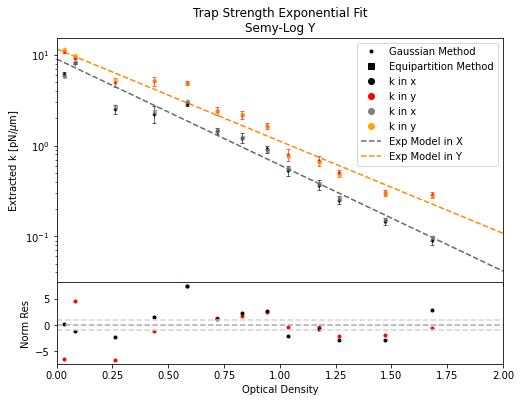

I believe that there are human errors due to slight misplacement of
ND filter and angle of filter that courld cause inconsistent results.
It is clear that the data is underfit and the propagated errors
are smaller than they should be. Closer consideration of errors is
needed here to quantify how the intesnity changes with ND filter error
and if the laser intensity varies with time.

By eye if we scale uncertainties in y by 3 we get a reduced chi^2 of ~1.


In [ ]:
def powerModel(relPower,slope,intercept = 0):
    return intercept*np.e**(relPower*slope)

#yerr_array_gaussx *= 3
#yerr_array_gaussy *= 3


fig = plt.figure(figsize = (8,6))
gs = fig.add_gridspec(2,1, hspace=0,wspace = 0,height_ratios = (3,1))
ax1, ax2 = gs.subplots(sharex=True, sharey=False)

ax1.errorbar(OD_Array,k_arr_strength_gauss[:,0],yerr = yerr_array_gaussx, xerr = OD_Array_error, fmt =".",color = "black",alpha = alphaVal,linewidth = 1,capsize = 2)
ax1.errorbar(OD_Array,k_arr_strength_gauss[:,1],yerr = yerr_array_gaussy, xerr = OD_Array_error, fmt =".",color = "red",alpha = alphaVal,linewidth = 1,capsize = 2)
ax1.set(ylabel = r"Extracted k [pN/$\mu$m]",xlabel = "OD [w.r.t. Unnatenuated]")

ax1.errorbar(OD_Array,k_arr_strength_equi[:,0], xerr = OD_Array_error, fmt="s",markersize = 3,color = "grey",alpha = alphaVal,linewidth = 1,capsize = 2)
ax1.errorbar(OD_Array,k_arr_strength_equi[:,1], xerr = OD_Array_error, fmt="s",markersize = 3,color = "orange",alpha = alphaVal,linewidth = 1,capsize = 2)

ax1.plot(-10,-10,"k.",label = "Gaussian Method")
ax1.plot(-10,-10,"ks",label = "Equipartition Method")
ax1.plot(-10,-10,"o",label = "k in x",color = "black")
ax1.plot(-10,-10,"o",label = "k in y",color = "red")
ax1.plot(-10,-10,"o",label = "k in x",color = "grey")
ax1.plot(-10,-10,"o",label = "k in y",color = "orange")

# Set up fit qith initial valued by eye
a_init = -3
b_init = 10
modelx = np.linspace(0,2,100)

#################### Fit in X
pOpt, pCov = curve_fit(powerModel, OD_Array, k_arr_strength_gauss[:,0],   #p0opt = optimized values of fitting paramters, pCov = covariance matrix
                       p0=[a_init,b_init],
                       sigma=yerr_array_gaussx,
                       absolute_sigma=True)
a_optx = pOpt[0]
b_optx = pOpt[1]
alpha_vecx = np.sqrt(np.diag(pCov))
alpha_a_optx = alpha_vecx[0]
alpha_b_optx = alpha_vecx[1]

# Print best fit parameters
dec = 4 # set resolution of output rounding
print('\033[91m'+"Power Fit Analysis for X"+'\033[0m')
print("Best Fit Parameters\n a_opt =",np.around(a_optx,dec),"+/-",np.around(alpha_a_optx,dec))
print(" b_opt =",np.around(b_optx,dec),"+/-",np.around(alpha_b_optx,dec))

# Calculate Residuals
resx = k_arr_strength_gauss[:,0] - powerModel(OD_Array,a_optx,b_optx)
normResx = resx/yerr_array_gaussx

# Calculate Chi squared statistics
N = len(OD_Array)
chiSqx = np.sum(normResx**2)
nu = N  - len(pOpt) # points minus #fit parameters
chiSigma = np.sqrt(2*nu)
print("\nFit Statistics\n ChiSq =",chiSqx,"+/-",chiSigma)
print(" nu =",nu)
print(" Reduced Chi =",chiSqx/nu)

modely = powerModel(modelx,a_optx,b_optx)
ax1.plot(modelx,modely,label = "Exp Model in X",color = "dimgrey",ls = "dashed")

#################### Fit in Y
pOpt, pCov = curve_fit(powerModel, OD_Array, k_arr_strength_gauss[:,1],   #p0opt = optimized values of fitting paramters, pCov = covariance matrix
                       p0=[a_init,b_init],
                       sigma=yerr_array_gaussy,
                       absolute_sigma=True)
a_opty = pOpt[0]
b_opty = pOpt[1]
alpha_vecy = np.sqrt(np.diag(pCov))
alpha_a_opty = alpha_vecy[0]
alpha_b_opty = alpha_vecy[1]

# Print best fit parameters
dec = 4 # set resolution of output rounding
print('\033[91m'+"\nPower Fit Analysis for Y"+'\033[0m')
print("Best Fit Parameters\n a_opt =",np.around(a_opty,dec),"+/-",np.around(alpha_a_opty,dec))
print(" b_opt =",np.around(b_opty,dec),"+/-",np.around(alpha_b_opty,dec))

# Calculate Residuals
resy = k_arr_strength_gauss[:,1] - powerModel(OD_Array,a_opty,b_opty)
normResy = resy/yerr_array_gaussy

# Calculate Chi squared statistics
N = len(OD_Array)
chiSqy = np.sum(normResy**2)
nu = N  - len(pOpt) # points minus #fit parameters
chiSigma = np.sqrt(2*nu)
print("\nFit Statistics\n ChiSq =",chiSqy,"+/-",chiSigma)
print(" nu =",nu)
print(" Reduced Chi =",chiSqy/nu)

modely = powerModel(modelx,a_opty,b_opty)
ax1.plot(modelx,modely,label = "Exp Model in Y",color = "darkorange",ls = "dashed")

ax1.set(title="Trap Strength Exponential Fit\nSemy-Log Y",xlim = (0,2),yscale = "Log");
ax1.legend()


ax2.plot(OD_Array,normResx,"r.")
ax2.plot(OD_Array,normResy,"k.")
ax2.axhline(0,ls="--",color = "darkgrey")
ax2.axhline(1,ls="--",color = "lightgrey")
ax2.axhline(-1,ls="--",color = "lightgrey")
ax2.set(ylabel="Norm Res",xlabel="Optical Density")
plt.savefig("Notes/strengthAnalysis_k_vs_OD_logFit.pdf",dpi = 300)
plt.show()

print("I believe that there are human errors due to slight misplacement of\nND filter and angle of filter that courld cause inconsistent results.\nIt is clear that the data is underfit and the propagated errors\nare smaller than they should be. Closer consideration of errors is\nneeded here to quantify how the intesnity changes with ND filter error\nand if the laser intensity varies with time.\n\nBy eye if we scale uncertainties in y by 3 we get a reduced chi^2 of ~1.")

This trend makes sense as according to [1]:

OD = $-log(\frac{\textrm{Percent Transmision}}{100 \%})$,

And so as we decrease OD, the percent of transmitted intensity falls exponentially! According to [2] we can expect the stiffness $k$ to be dierctly perportional to laser power (in $W$). Regardless of how much laser makes it through the objective (some will be blocked by the objectives opening), the relative power making it to the sample is perportional to the relative power through the ND filter. We could have equaly fit a linear slope to our first "Trap strength as a function of Relative Power," but this optical density plot may be in more general terms for optical communities.


[1] https://www.edmundoptics.com/knowledge-center/application-notes/optics/understanding-neutral-density-filters/, accessed Feb 21, 2022.

[2] https://link.springer.com/article/10.1140/epjp/s13360-020-00843-5, Accessed Feb 21, 2022.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4bb45f9e-f9d7-4771-843d-2a6451217511' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>